# Logistic Regression

Enough theory! Let's use logistic regression to classify some flowers.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
data = pd.read_csv('http://www.stat.cmu.edu/~rnugent/PUBLIC/teaching/CMU729/HW/iris.txt',sep=' ')
data.columns =  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Classification of Setosa's

We'll try to recreate the prediction problem in the slides. We'll classify whether an iris is a setosa or not based only on the sepal_widtth and the sepal_length.

In [4]:
data['is_setosa'] =  data.species.apply(lambda x: 'setosa' if x =='setosa' else 'not_setosa') 
#  (data.species == 'setosa').values.astype('int')

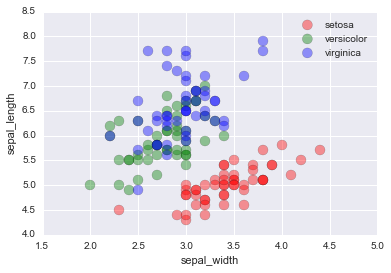

In [5]:
# Visualization of the space
color_map = ['r','g','b']

for idx,c in enumerate(np.unique(data.species)):
    data_sub = data[ data.species == c ]
    plt.scatter(data_sub['sepal_width'],
                data_sub['sepal_length'],
                s=100,
                alpha=0.4,
                c=color_map[idx],
                label=c)
plt.xlabel('sepal_width'), plt.ylabel('sepal_length')
plt.legend()

In [6]:
# Create our features
features = ['sepal_width','sepal_length']
X = data[ features ]
y = data[ 'is_setosa' ]

In [7]:
# Create our actual model
clf = linear_model.LogisticRegression()

In [8]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [9]:
# Predict the classes
clf.predict(X)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'not_setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_setosa', 'not_setosa', 'not_setosa', 'not_setosa',
       'not_s

In [10]:
# What are the unique classes in this model?
clf.classes_

array(['not_setosa', 'setosa'], dtype=object)

In [11]:
# Predict the probabilities of the class!
clf.predict_proba(X)

array([[  1.09148161e-01,   8.90851839e-01],
       [  3.54812490e-01,   6.45187510e-01],
       [  1.30599778e-01,   8.69400222e-01],
       [  1.48711623e-01,   8.51288377e-01],
       [  6.01810828e-02,   9.39818917e-01],
       [  4.96357033e-02,   9.50364297e-01],
       [  5.00011855e-02,   9.49998814e-01],
       [  1.24711797e-01,   8.75288203e-01],
       [  1.91097648e-01,   8.08902352e-01],
       [  2.69365876e-01,   7.30634124e-01],
       [  1.04111494e-01,   8.95888506e-01],
       [  7.96962761e-02,   9.20303724e-01],
       [  3.00079756e-01,   6.99920244e-01],
       [  1.09901176e-01,   8.90098824e-01],
       [  8.65774329e-02,   9.13422567e-01],
       [  1.47059381e-02,   9.85294062e-01],
       [  4.96357033e-02,   9.50364297e-01],
       [  1.09148161e-01,   8.90851839e-01],
       [  1.41201716e-01,   8.58798284e-01],
       [  3.56005674e-02,   9.64399433e-01],
       [  2.78345872e-01,   7.21654128e-01],
       [  5.21904883e-02,   9.47809512e-01],
       [  

In [12]:
# Predictions are really good!
# Is this just because we're testing on the training set?
clf.score(X,y)

0.99333333333333329

In [13]:
# Looks pretty good in reality!
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

cvScores = cross_val_score(clf,X,y,cv=KFold(len(X),n_folds=5,shuffle=True))
np.mean(cvScores)

0.9933333333333334

# Plotting the decision boundaries

Remember that given `X = sepal_width, sepal_length`, we are predicting `p(y = setosa)`.

$$P(y = setosa) = \frac{1}{1+e^{-(\alpha+\beta_1x_1+\beta_2x_2)}}$$

where $\beta_1$ corresponds to sepal_width, and $\beta_2$ corresponds to sepal_length.

In addition, remember that we solve for alphas and betas such that:

$$ P(y = setosa) = 0 = \frac{1}{1+e^{-(\alpha+\beta_1x_1+\beta_2x_2)}}$$

This yields an **equation of a line/plane/hyperplane** at:

$$\alpha + \beta_1x_1 + \beta_2x_2 = 0$$

This is also called a **decision boundary**. It represents the line/boundary that **separates** the two classes at the P == 0.5 mark.

We can also plot this line in our 2d feature space by rewriting the equation as:

$$x_2 = -\frac{\alpha+\beta_1x_1}{\beta_2}$$

We are going to take our scatter above and add in a decision boundary.

In [14]:
# Create a single model instead of running CV
clf = linear_model.LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [15]:
# Before we can do anything, we need to know what the intercept,
# beta1, and beta2 values are.
alpha = clf.intercept_
betas = clf.coef_

# Notice that betas is a list of list.
# Logistic returns a set of betas by default (onevsall)
print alpha, betas

[ 0.80059233] [[ 3.99890697 -2.48966566]]


In [16]:
# We'll create a domain for the x_1 values (ie. range across sepal_width)
x1 = np.linspace(2.0,4.5,1000)
x2 = -(alpha + betas[0][0]*x1) / betas[0][1]

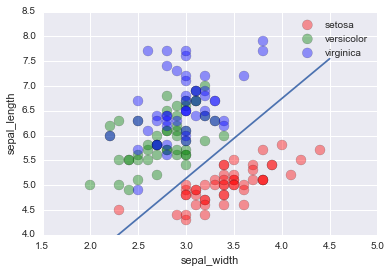

In [17]:
# Visualization of the space
color_map = ['r','g','b']

for idx,c in enumerate(np.unique(data.species)):
    data_sub = data[ data.species == c ]
    plt.scatter(data_sub['sepal_width'],
                data_sub['sepal_length'],
                s=100,
                alpha=0.4,
                c=color_map[idx],
                label=c)

# New plot lines here!
plt.plot(x1,x2)
plt.xlim(1.5,5.0), plt.ylim(4.0,8.5)

plt.xlabel('sepal_width'), plt.ylabel('sepal_length')
plt.legend()

So we have plotted the line at which above, we classify as one class, and below, we classify as the other. But, which is which? And how far away from the line are we very sure of the probability of a datapoint being in that class?

We can visualize this through plotting the probabilities predicted by our `LogisticRegression()` classifier. [ Remember `clf.predict_proba()` ? We'll be using that]

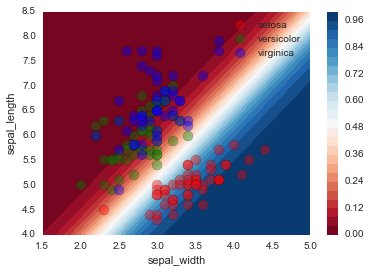

In [18]:
# Create a grid of sepal_width and sepal_length values we'll predict over
xx, yy = np.mgrid[1.5:5.0:.01, 4.0:8.5:.01] 
grid = np.c_[xx.ravel(),yy.ravel()]

# Grid is a ndarray of sepal_width, sepal_length values
probs = clf.predict_proba(grid)[:,1].reshape(xx.shape)

# Create a filled contour
f, ax = plt.subplots()
contour = ax.contourf(xx,yy,probs,25,cmap="RdBu",vmin=0,vmax=1)
f.colorbar(contour)

#Finally scatter our items onto it

for idx,c in enumerate(np.unique(data.species)):
    data_sub = data[ data.species == c ]
    plt.scatter(data_sub['sepal_width'],
                data_sub['sepal_length'],
                s=100,
                alpha=0.4,
                c=color_map[idx],
                label=c)

plt.xlim(1.5,5.0), plt.ylim(4.0,8.5)

plt.xlabel('sepal_width'), plt.ylabel('sepal_length')
plt.legend()

Very cool! Notice how quickly the probabilities increase as the _distance_ from the separating plane increases. 

# Exercise

** Part 1 **

* Make a classifier for virginica followers using logistic regression (predict 1 or "viriginica" vs. 0 or "other"
* Use only the $\beta_1$ = petal_width, and $\beta_2$ = petal_length
* How does this classifier do using cross validation?
* **(Medium)** Plot the decision boundary
* **(Hard)** Plot a filled contour of the probabilities

**Part 2**

Now, train and predict if an iris is a "versicolor" or "other" based on petal_width and sepal_length only. 

* What is the score on the training set?
* Plot a scatter as well as the decision boundary to see why
* [Hint: Look at the class labels output]
* The distance from the decision boundary should also help you diagnose

**Discuss and confirm these with a partner.**

0.66666666666666663

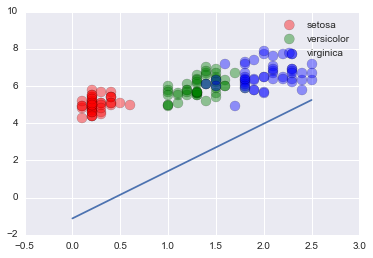

In [19]:
# Visualization of the space
color_map = ['r','g','b']

for idx,c in enumerate(np.unique(data.species)):
    data_sub = data[ data.species == c ]
    plt.scatter(data_sub['petal_width'],
                data_sub['sepal_length'],
                s=100,
                alpha=0.4,
                c=color_map[idx],
                label=c)
plt.legend()

clf = linear_model.LogisticRegression()
y = data.species.apply(lambda x: "versicolor" if x=="versicolor" else "other")
clf.fit(data[['petal_width','sepal_length']],y)

# We'll create a domain for the x_1 values (ie. range across sepal_width)
alpha = clf.intercept_
betas = clf.coef_
x1 = np.linspace(0,2.5,1000)
x2 = -(alpha + betas[0][0]*x1) / betas[0][1]
plt.plot(x1,x2)

clf.score(data[['petal_width','sepal_length']],y)

Interesting (Discussion about what's going on...)


There's multiple ways to solve this:
* Add more features
* Add polynomial features
* Use Multiclass Logistic regression (By default, LogisticRegression uses One vs. All methodology)
* Use a different technique

We'll try to tackle this problem by adding a polynomial feature

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

<matplotlib.contour.QuadContourSet instance at 0x10ee862d8>

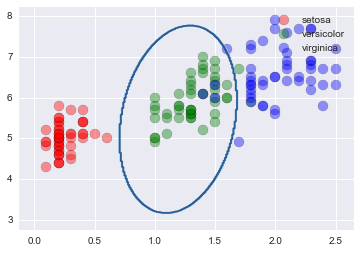

In [21]:
# Respecify the features and y that we're interested in predicting
X = data[ ['petal_width','sepal_length']]
y = data.species.apply(lambda x: 1 if x=="versicolor" else 0)

# Use pipeline to create a polynomial of degree 2 in X
pf = PolynomialFeatures(degree=2)
clf = linear_model.LogisticRegression(C=10000)
model = make_pipeline(pf,clf)
model.fit(X,y)

# Visualization of the space
color_map = ['r','g','b']
for idx,c in enumerate(np.unique(data.species)):
    data_sub = data[ data.species == c ]
    plt.scatter(data_sub['petal_width'],
                data_sub['sepal_length'],
                s=100,
                alpha=0.4,
                c=color_map[idx],
                label=c)
plt.legend()


# Create a grid of sepal_width and sepal_length values we'll predict over
xx, yy = np.meshgrid( np.arange(0,2.0,.01), np.arange(3,8,.01) )
grid = np.c_[xx.ravel(),yy.ravel()]


# Grid is a ndarray of sepal_width, sepal_length values
preds = model.predict(grid).reshape(xx.shape)
preds

# Plot Blue for when the p
plt.contour(xx,yy,preds,cmap=plt.cm.Blues,alpha=0.5)



# Regularization

<img src="http://cdn.cultofmac.com/wp-content/uploads/2011/06/one-more-thing.jpg"/>

From the code block above, you might have noticed a parameter C=10000, and if you looked at the arguments for LogisticRegression(), you would have noticed a penalty of l1 or l2.

Does this seem familiar to you? `[Hint: it should--i.e. regularization]`

Then the next question is, why do we need regularization?

# Exercise

This is a relatively easy exercise (code wise) but will require some thought about regularization and the bias variance tradeoff.

Vary the parameter `x_0` from -.45 toward 0. (Try values of -.1, -.01, etc. as well)

* What happens to the $\beta_1$ values, and the curve of the sigmoid?

Now, compare when x_0 = -.01, and when x_01 = .01.

* What happens to the \$beta_$ values and the curve of the sigmoid?
* How might this be a case of overfitting? (Think about how noise might flip our predictions)

Discuss your insights and thoughts with a partner.


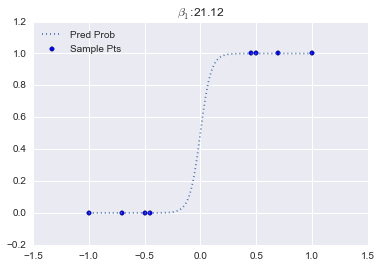

In [7]:
# Example why regularization is on by default

x_0 = -.45
x_1 = -x_0

x = [-1,-.7,-.5,x_0,x_1,.5,.7,1.0]
y = [ 0,  0,  0,  0, 1, 1, 1,  1]


# Still being regularized, but C is the inverse of regularization parameter
# Setting high C -> low regularization. 
clf = linear_model.LogisticRegression(C=100000000000000)
clf.fit(np.array(x).reshape((len(x),1)),y)


domain = np.linspace(-1,1,1000)
domainpred = clf.predict_proba(domain.reshape((len(domain),1)))
domainpred = zip(*domainpred)[1]

plt.scatter(x,y,label="Sample Pts")

plt.plot(domain,domainpred,":",label="Pred Prob")
plt.title(r"$\beta_1$:%.2f" % clf.coef_[0])
plt.legend(loc='best') 